In [1]:
#--------> install all libraries
!pip install regex
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install wordcloud
!pip install matplotlib
!pip install nltk
!pip install scikit-learn



[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#-------->  import libraries
#--------> utilities
import re
import pickle
import numpy as np
import pandas as pd

#--------> plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#--------> nltk
import nltk
from nltk.stem import WordNetLemmatizer

#--------> sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [1]:
dataset_path = "training.1600000.processed.noemoticon.csv"

In [4]:
#--------> Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv(dataset_path,
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)


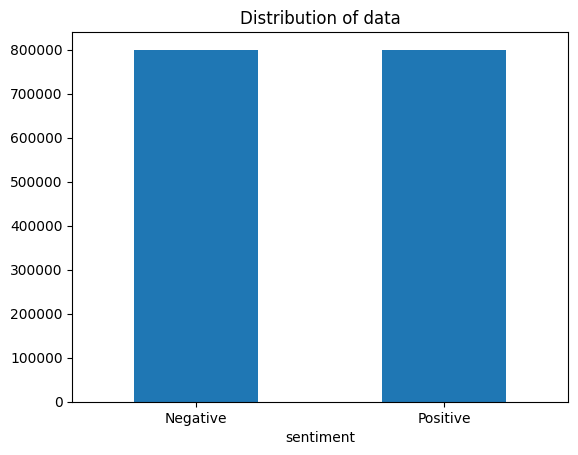

In [5]:

#--------> Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
#--------> Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

#--------> Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

#--------> Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [6]:
#--------> Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#-------->': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

#-------->#--------> Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [7]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
def preprocess(textdata):
    processedText = []

    #--------> Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    #--------> Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        #--------> Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        #--------> Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        #--------> Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)
        #--------> Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        #--------> Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            #--------> Checking if the word is a stopword.
            #-------->if word not in stopwordlist:
            if len(word)>1:
                #--------> Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')

        processedText.append(tweetwords)

    return processedText

Calculate Time 

In [9]:
import time
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 79 seconds


Plot the Negative Data

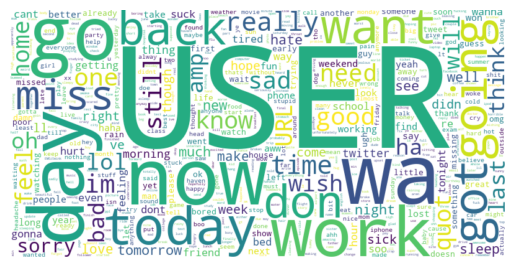

In [12]:

data_neg = processedtext[:800000]
#--------> Generate the word cloud
wc = WordCloud(max_words=1000, width=800, height=400, 
               background_color='white', colormap='viridis', 
               collocations=False).generate(" ".join(data_neg))

#--------> Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Plot The positive Data

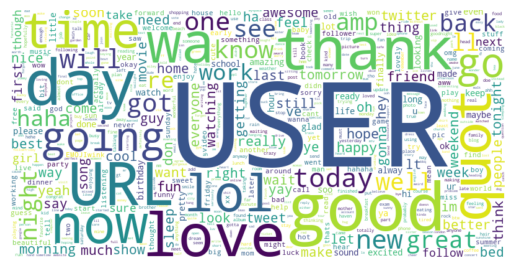

In [13]:
data_pos = processedtext[800000:]
#--------> Generate the word cloud
wc = WordCloud(max_words=1000, width=800, height=400, 
               background_color='white', colormap='viridis', 
               collocations=False).generate(" ".join(data_pos))

#--------> Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Split the Data into Training And Testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.3, random_state = 0)
print(f'Data Split done.')

Data Split done.


Make the Vectors from the data

In [19]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature_words:  500000


In [20]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [21]:
def model_Evaluate(model):

    #--------> Predict values for Test dataset
    y_pred = model.predict(X_test)

    #--------> Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    #--------> Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Apply the GradientBoostingClassifier and  AdaBoostClassifier Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

#--------> Define the parameters to tune
n_estimators = 100
learning_rate = 0.1
max_depth = 3

#--------> Gradient Boosting Model
gbm_model = GradientBoostingClassifier(n_estimators= n_estimators, learning_rate=learning_rate, max_depth=max_depth)
gbm_model.fit(X_train, y_train)
gbm_accuracy = gbm_model.score(X_test, y_test)

print("Gradient Boosting Model Accuracy:", gbm_accuracy)

Gradient Boosting Model Accuracy: 0.7013354166666667


              precision    recall  f1-score   support

           0       0.69      0.73      0.71    239877
           1       0.71      0.67      0.69    240123

    accuracy                           0.70    480000
   macro avg       0.70      0.70      0.70    480000
weighted avg       0.70      0.70      0.70    480000



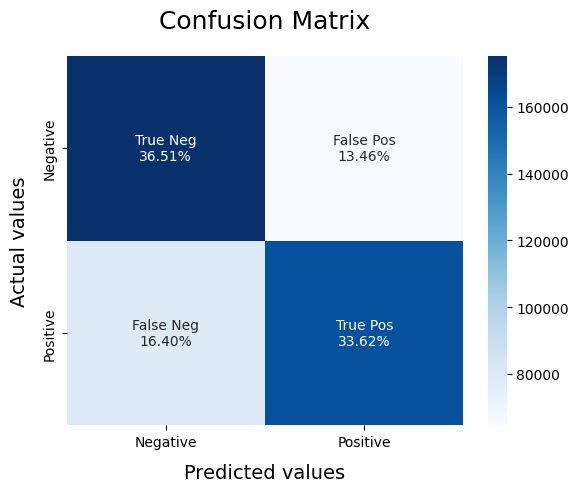

In [23]:
model_Evaluate(gbm_model)

In [35]:
#--------> Define the parameters to tune for AdaBoost
ada_n_estimators = 50
ada_learning_rate = 1.0


adaboost_model = AdaBoostClassifier(n_estimators=ada_n_estimators, learning_rate=ada_learning_rate)
adaboost_model.fit(X_train, y_train)
adaboost_accuracy = adaboost_model.score(X_test, y_test)


print("AdaBoost Model Accuracy:", adaboost_accuracy)

AdaBoost Model Accuracy: 0.698


              precision    recall  f1-score   support

           0       0.69      0.73      0.71     39989
           1       0.71      0.67      0.69     40011

    accuracy                           0.70     80000
   macro avg       0.70      0.70      0.70     80000
weighted avg       0.70      0.70      0.70     80000



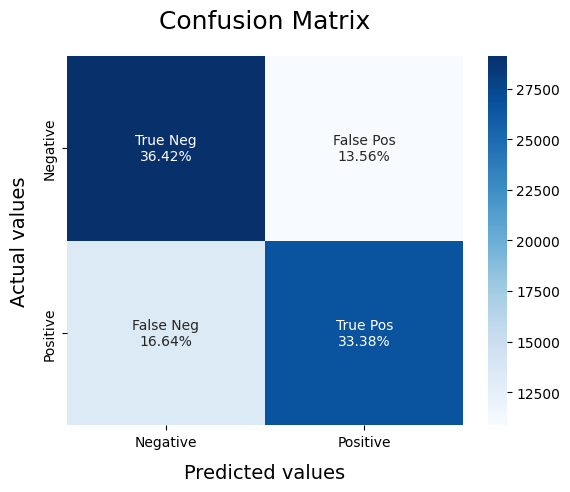

In [50]:
model_Evaluate(adaboost_model)

In [52]:
import os
#--------> Define the directory where you want to save the models
save_dir = "/Models/"

#--------> Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

#--------> Save GBM model
try:
    with open(os.path.join(save_dir, 'Sentiment-gbm.pickle'), 'wb') as file:
        pickle.dump(gbm_model, file)
    print("GBM model saved successfully.")
except Exception as e:
    print("Error saving GBM model:", e)

#--------> Save AdaBoost model
try:
    with open(os.path.join(save_dir, 'Sentiment-adaboost.pickle'), 'wb') as file:
        pickle.dump(adaboost_model, file)
    print("AdaBoost model saved successfully.")
except Exception as e:
    print("Error saving AdaBoost model:", e)

GBM model saved successfully.
AdaBoost model saved successfully.


In [60]:
def load_models():
    #--------> Load the vectoriser.
    file = open('/Models/Sentiment-gbm.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    #--------> Load the LR Model.
    file = open('/Models/Sentiment-adaboost.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()

    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    #--------> Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)

    #--------> Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))

    #--------> Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    #--------> Loading the models.
    #-------->vectoriser, LRmodel = load_models()

    #--------> Text to classify should be in a list.
    text = ["I hate twitter",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good"]

    df = predict(vectoriser, gbm_model, text)
    print(df)

                              text sentiment
0                  I  hate twitter  Negative
1       May the Force be with you.  Positive
2  Mr. Stark, I don't feel so good  Negative
